In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import timedelta
import seaborn as sns

In [6]:
noreuse = pd.read_csv('outputs/noreuse-stdlib-compile-profile.csv',
  names=["File", "Condition", "Metric", "Value"])
reuse = pd.read_csv('outputs/reuse-stdlib-compile-profile.csv', 
                      names=["File", "Condition", "Metric", "Value"])
print("noreuse"); display(noreuse);
print("reuse"); display(reuse);

noreuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,148340736
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321696
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538544
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26157278
...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,4309
9346,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0
9347,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,792
9348,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894


reuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,145059840
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321696
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538547
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26157281
...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,4309
9346,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0
9347,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,792
9348,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894


In [7]:
# Filtering the rows where Metric is 'time_elapsed_ms' and then summing the 'Value' column for both DataFrames
sum_time_elapsed_reuse = reuse[reuse["Metric"] == "time_elapsed_ms"]["Value"].sum()
sum_time_elapsed_no_reuse = noreuse[noreuse["Metric"] == "time_elapsed_ms"]["Value"].sum()

sum_time_elapsed_reuse, sum_time_elapsed_no_reuse

# Ensuring the values are in a compatible format for timedelta
time_reuse = timedelta(milliseconds=int(sum_time_elapsed_reuse))
time_no_reuse = timedelta(milliseconds=int(sum_time_elapsed_no_reuse))

# Formatting as hours:minutes:seconds.milliseconds again
time_format_reuse = str(time_reuse)
time_format_no_reuse = str(time_no_reuse)
display(HTML(f"<h3>time (reuse): {time_format_reuse} | time (noreuse): {time_format_no_reuse}</h3>"))

In [8]:
df_merged = pd.merge(reuse, noreuse, on=["File", "Metric"], suffixes=('_reuse', '_no_reuse'))
display(df_merged)

,File,Condition_reuse,Metric,Value_reuse,Condition_no_reuse,Value_no_reuse
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,145059840,reuse_across_ctor_disabled,148340736
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321696,reuse_across_ctor_disabled,1321696
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538547,reuse_across_ctor_disabled,26538544
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439,reuse_across_ctor_disabled,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26157281,reuse_across_ctor_disabled,26157278
...,...,...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,4309,reuse_across_ctor_disabled,4309
9346,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0,reuse_across_ctor_disabled,0
9347,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,792,reuse_across_ctor_disabled,792
9348,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894,reuse_across_ctor_disabled,2894


,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Compiler/Options.lean,227,901,674,74.805771
1,Lean/Compiler/NeverExtractAttr.lean,210,401,191,47.630923
2,Lean/Meta/Tactic/LinearArith/Simp.lean,312,578,266,46.020761
3,Lean/Eval.lean,263,402,139,34.577114
4,Lake.lean,492,674,182,27.002967
...,...,...,...,...,...
845,Lean/Elab/Tactic/Rfl.lean,722,334,-388,-116.167665
846,Lean/Server/Snapshots.lean,947,426,-521,-122.300469
847,Init/Hints.lean,390,157,-233,-148.407643
848,Lake/DSL/Extensions.lean,694,232,-462,-199.137931


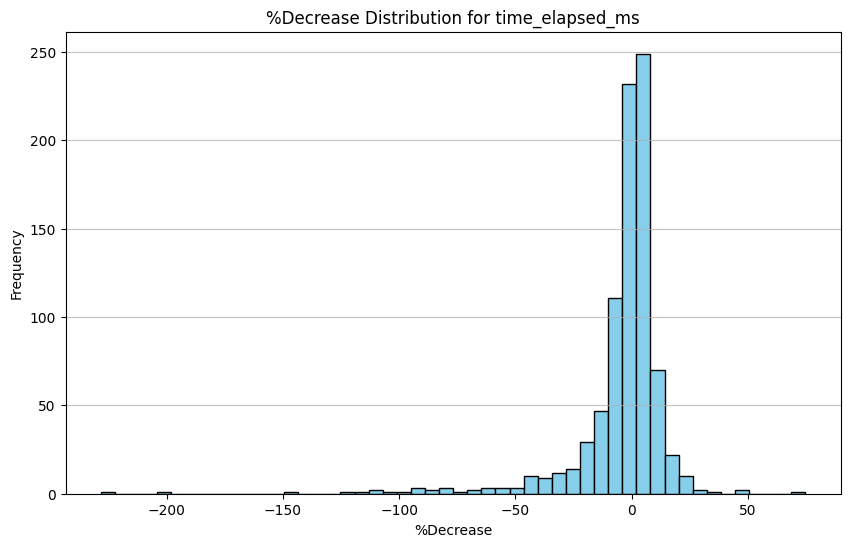

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Data/Int/Basic.lean,93605888,98062336,4456448,4.544505
1,Init/Data/String/Extra.lean,99381248,103972864,4591616,4.416168
2,Init/Data/Nat/Bitwise/Basic.lean,88301568,92233728,3932160,4.263256
3,Init/Data/ToString/Basic.lean,96104448,100298752,4194304,4.181811
4,Init/Data/Array/Subarray.lean,105897984,110489600,4591616,4.155700
...,...,...,...,...,...
845,Init/Data/Array.lean,105295872,105553920,258048,0.244470
846,Lean/Elab/PreDefinition.lean,339152896,339939328,786432,0.231345
847,Lean/Elab/Tactic/Conv.lean,291713024,292368384,655360,0.224156
848,Init/Data/FloatArray.lean,88743936,88743936,0,0.000000


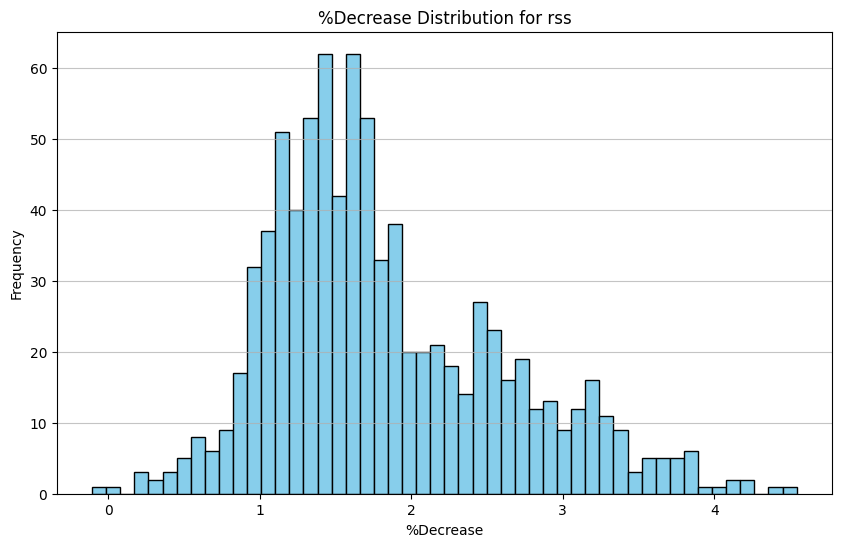

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Data/BitVec/Bitblast.lean,7208204,7208721,517,0.007172
1,Init/Data/Nat/Mod.lean,3459139,3459218,79,0.002284
2,Init/Data/Stream.lean,2125253,2125277,24,0.001129
3,Init/Core.lean,28174160,28174378,218,0.000774
4,Init/Data/Nat/Lemmas.lean,30686638,30686818,180,0.000587
...,...,...,...,...,...
845,Init/Data/Nat/Bitwise/Lemmas.lean,21486336,21486185,-151,-0.000703
846,Lean/Elab/GuardMsgs.lean,8560384,8560322,-62,-0.000724
847,Init/Data/AC.lean,12422819,12422624,-195,-0.001570
848,Init/Data/BitVec/Lemmas.lean,73118552,73117230,-1322,-0.001808


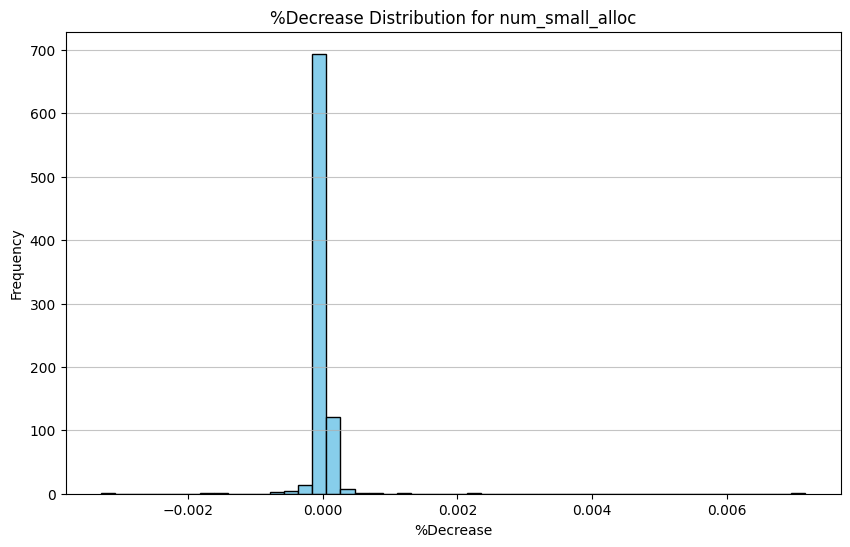

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Elab/Tactic/RCases.lean,1971846,1971847,1,0.000051
1,Init/Prelude.lean,1273439,1273439,0,0.000000
2,Lean/Elab/Tactic/Congr.lean,57497,57497,0,0.000000
3,Lean/PrettyPrinter/Delaborator/Builtins.lean,5175335,5175335,0,0.000000
4,Lean/Meta/Tactic/Simp/BuiltinSimprocs/UInt.lean,1421227,1421227,0,0.000000
...,...,...,...,...,...
845,Lean/Parser/StrInterpolation.lean,64847,64847,0,0.000000
846,Lean/Data/Lsp/Utf16.lean,77417,77417,0,0.000000
847,Lean/LazyInitExtension.lean,54476,54476,0,0.000000
848,Lean/CoreM.lean,840507,840507,0,0.000000


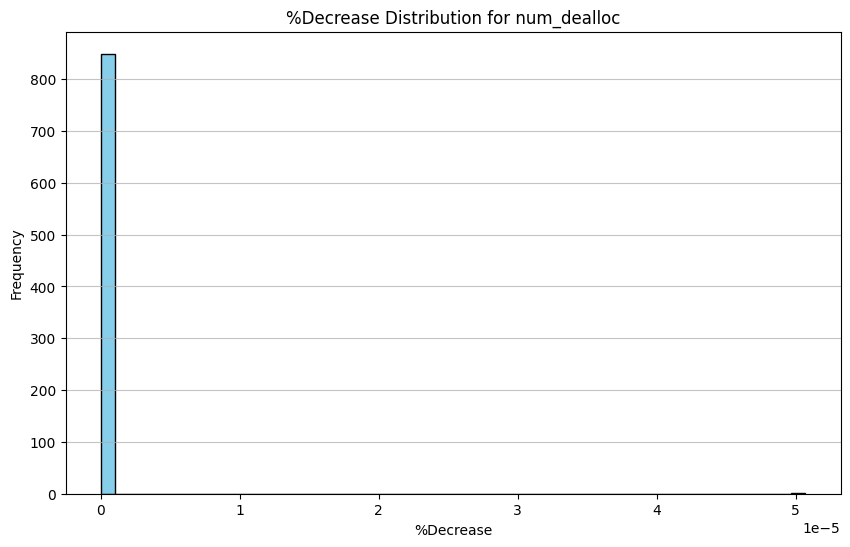

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Data/BitVec/Bitblast.lean,6848457,6848974,517,0.007549
1,Init/Data/Nat/Mod.lean,3128209,3128288,79,0.002525
2,Init/Data/Stream.lean,1839462,1839486,24,0.001305
3,Init/Core.lean,27785974,27786192,218,0.000785
4,Init/Data/Nat/Lemmas.lean,30270552,30270732,180,0.000595
...,...,...,...,...,...
845,Init/Data/Nat/Bitwise/Lemmas.lean,21105325,21105174,-151,-0.000715
846,Lean/Elab/GuardMsgs.lean,7854822,7854760,-62,-0.000789
847,Init/Data/AC.lean,12062588,12062393,-195,-0.001617
848,Init/Data/BitVec/Lemmas.lean,72634003,72632681,-1322,-0.001820


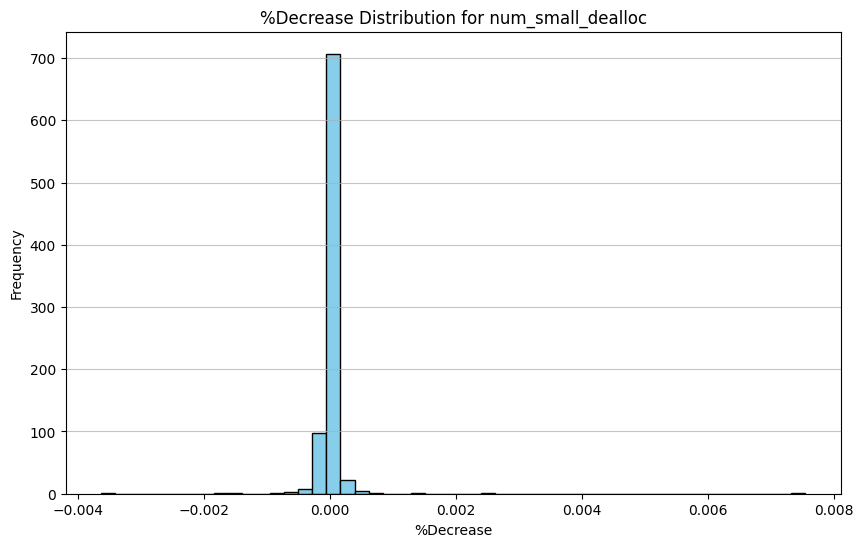

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Prelude.lean,353579,353579,0,0.0
1,Lean/Elab/Tactic/Cache.lean,93540,93540,0,0.0
2,Lean/Elab/Tactic/Repeat.lean,80060,80060,0,0.0
3,Lean/PrettyPrinter/Delaborator/Builtins.lean,1682933,1682933,0,0.0
4,Lean/Meta/Tactic/Simp/BuiltinSimprocs/UInt.lean,2068625,2068625,0,0.0
...,...,...,...,...,...
845,Lean/Parser/StrInterpolation.lean,16919,16919,0,0.0
846,Lean/Data/Lsp/Utf16.lean,18541,18541,0,0.0
847,Lean/LazyInitExtension.lean,10832,10832,0,0.0
848,Lean/CoreM.lean,494608,494608,0,0.0


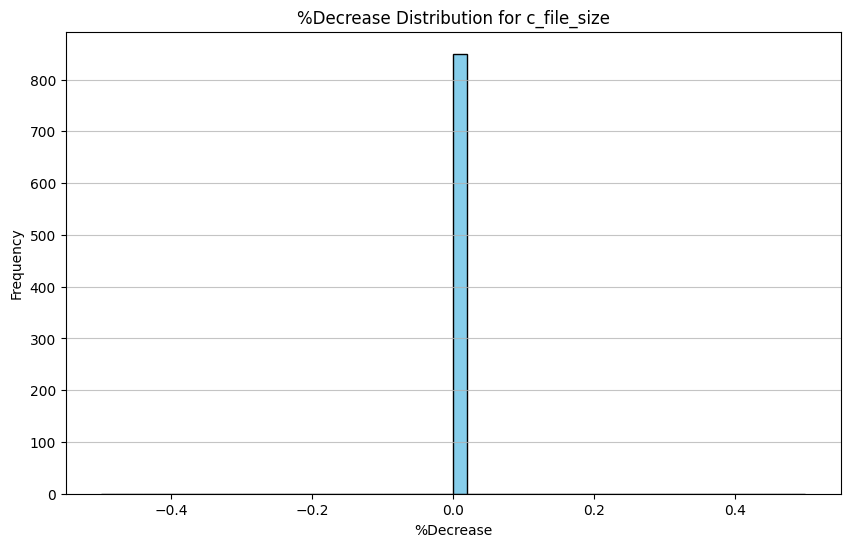

In [9]:
# metrics for which we should compute decreases
df_corr = pd.DataFrame(df_merged["File"].unique(), columns=["File"]) 

for metric in ["time_elapsed_ms", "rss", "num_small_alloc", "num_dealloc", "num_small_dealloc", "c_file_size"]:
  display(HTML(f"<h1>{metric}</h1>"))
  df_metric = df_merged[df_merged["Metric"] == metric].copy()
  df_metric["absolute_diff"] = df_merged["Value_no_reuse"] - df_merged["Value_reuse"]
  df_metric["%Decrease"] = (
    100.0 * (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )
  df_metric = df_metric.drop(["Condition_reuse", "Condition_no_reuse", "Metric"], axis=1)

  df_kv = df_metric[["File", "%Decrease"]].copy()
  df_kv.rename(columns={"%Decrease": metric}, inplace=True)
  # df_corr = pd.merge(df_corr, df_kv, on="File", how="outer")
  
  # Sorting by maximum decrease
  df_metric_sorted = df_metric.sort_values(by="%Decrease", ascending=False)
  df_metric_sorted.reset_index(drop=True, inplace=True) # changes index to start from zero.
  display(df_metric_sorted)
  plt.figure(figsize=(10, 6))
  plt.hist(df_metric_sorted['%Decrease'], bins=50, color='skyblue', edgecolor='black')
  plt.title(f'%Decrease Distribution for {metric}')
  plt.xlabel('%Decrease')
  plt.ylabel('Frequency')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

# corr = df_corr.drop('File', axis=1).corr()  # Assuming df_corr is defined and populated
# plt.figure(figsize=(12,8))
# sns.heatmap(corr, cmap="Greens",annot=True)


,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,18509,4079948
Lean/Elab/Do.lean,16585,6414751
Lean/PrettyPrinter/Delaborator/Builtins.lean,13229,5255301
Lean/Compiler/IR/EmitLLVM.lean,12626,3669633
Lean/Elab/Term.lean,10665,4038028
...,...,...
Init/Data/FloatArray.lean,130,55352
Init/Data/String.lean,129,55469
Init/Data/Option/BasicAux.lean,127,58902


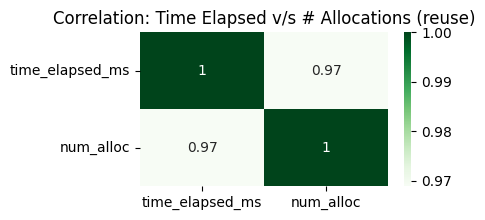

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,17725,4079948
Lean/Elab/Do.lean,17013,6414751
Lean/PrettyPrinter/Delaborator/Builtins.lean,12628,5255301
Lean/Compiler/IR/EmitLLVM.lean,11799,3669633
Lean/Elab/App.lean,11172,4041668
...,...,...
Init/Data/FloatArray.lean,128,55352
Init/Data/ToString.lean,128,56759
Init/Data/String.lean,126,55469


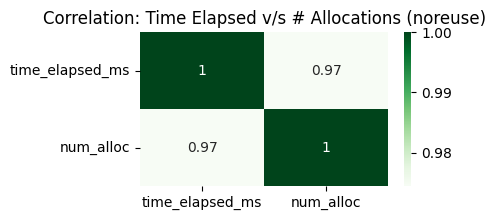

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,18509,4079948
Lean/Elab/Tactic/Omega/Frontend.lean,17725,4079948
Lean/Elab/Do.lean,17013,6414751
Lean/Elab/Do.lean,16585,6414751
Lean/PrettyPrinter/Delaborator/Builtins.lean,13229,5255301
...,...,...
Init/Data/String.lean,126,55469
Init/Data/Char.lean,119,53022
Init/Data/Char.lean,118,53022


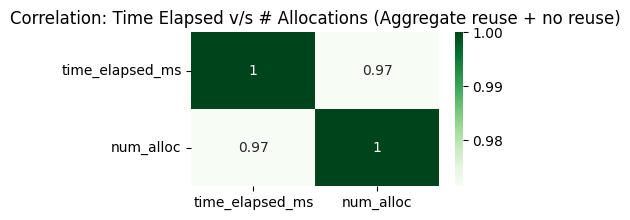

In [10]:
df_full = None

# for each file, grab num alloc and time elapsed.
variant2df = { "reuse" : reuse, "noreuse": noreuse }
for (variant, df) in variant2df.items():
    metric2df = {}
    for metric in ["time_elapsed_ms", "num_alloc"]:
      out = df[df["Metric"] == metric].copy()
      out = out[["File", "Value"]]
      out.rename(columns={"Value" : metric}, inplace=True)
      out = out[["File", metric]].set_index("File")
      metric2df[metric] = out
    
    df_metrics_merged = metric2df["time_elapsed_ms"].join(metric2df["num_alloc"])
    df_metrics_merged = df_metrics_merged.sort_values(by='time_elapsed_ms', ascending=False)

    display(HTML(f"<h3>Correlation: Time elapsed v/s # allocations ({variant})</h3>"))
    display(df_metrics_merged)
    corr = df_metrics_merged.corr()  # Assuming df_corr is defined and populated
    plt.figure(figsize=(4,2))
    sns.heatmap(corr, cmap="Greens",annot=True)
    plt.title(f"Correlation: Time Elapsed v/s # Allocations ({variant})")
    plt.show()

    
    if df_full is None:
        df_full = df_metrics_merged
    else:
        df_full = pd.concat([df_full, df_metrics_merged])

df_full = df_full.sort_values(by='time_elapsed_ms', ascending=False)
display(df_full)
corr = df_full.corr() 
plt.figure(figsize=(4,2))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Correlation: Time Elapsed v/s # Allocations (Aggregate reuse + no reuse)')
plt.show()


In [ ]:
def print_file_info(name):
    for reuses in ["reuse", "no_reuse"]: